In [1]:
#Time Series Forecasting
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
f_birth = pd.read_csv("C:/Users/prade/OneDrive/Desktop/Python/projects/Datasets/Time Series/daily-total-female-births-in-cal.csv", index_col= [0], parse_dates= [0])
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [13]:
type(f_birth)

pandas.core.frame.DataFrame

In [19]:
series_value = f_birth.values

In [20]:
type(series_value)

numpy.ndarray

In [21]:
f_birth.size

366

In [22]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [24]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [27]:
# remove last entry of the dataframe which is very odd as compared to the rest of the data
f_birth = f_birth[0:365]

In [26]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='Date'>

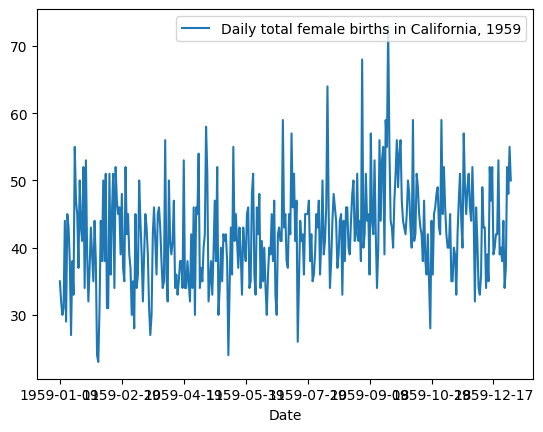

In [28]:
f_birth.plot()